##### <i>Shantusha Ramsoebhag - 1825217 - 05/06/2023</i>

# Prototype: Nail art design recommender system to inspire women with the best-fitting nail designs.

## Dataset

Images were scraped from Pinterest to collect data about nail art designs.

In [75]:
from turtle import title
import requests
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import time 
import os

### Import data

In [76]:
# Importing csv
nail_df = pd.read_csv('nail_dataset_prototype_new.csv', sep=';')
nail_df.head

<bound method NDFrame.head of      Image ID                                          Image url  \
0           1  https://i.pinimg.com/564x/aa/f6/30/aaf630447ee...   
1           2  https://i.pinimg.com/564x/e8/16/be/e816be0a903...   
2           3  https://i.pinimg.com/564x/ff/b1/97/ffb19745ff6...   
3           4  https://i.pinimg.com/564x/06/17/ca/0617caf5762...   
4           5  https://i.pinimg.com/564x/89/43/42/8943426ccf5...   
..        ...                                                ...   
315       316  https://i.pinimg.com/474x/21/1f/f6/211ff6bc4f8...   
316       317  https://i.pinimg.com/474x/d1/52/5e/d1525ef801f...   
317       318  https://i.pinimg.com/474x/32/21/38/32213873d98...   
318       319  https://i.pinimg.com/474x/92/f7/cd/92f7cd31da7...   
319       320  https://i.pinimg.com/474x/6e/e6/5f/6ee65f271c8...   

                     color       color group    shape       length nail art   \
0    emerald green, silver              dark   square        short       

### Data cleaning

In [77]:
# checking data types
nail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Image ID        320 non-null    int64 
 1   Image url       320 non-null    object
 2   color           320 non-null    object
 3   color group     320 non-null    object
 4   shape           320 non-null    object
 5   length          320 non-null    object
 6   nail art        320 non-null    object
 7   nail art level  320 non-null    object
 8   nail art style  320 non-null    object
 9   topic effect    320 non-null    object
 10  season          320 non-null    object
dtypes: int64(1), object(10)
memory usage: 27.6+ KB


In [78]:
# remove all extra spaces from column titles
nail_df.columns = nail_df.columns.str.strip()

# removing the extra spaces at the end of all strings of column nail art
nail_df['nail art'] = nail_df['nail art'].str.rstrip()
nail_df['nail art'].unique()

# removing all extra white spaces at the end of all strings from all other columns
nail_df['Image url'] = nail_df['Image url'].str.rstrip()
nail_df['color'] = nail_df['color'].str.rstrip()
nail_df['color group'] = nail_df['color group'].str.rstrip()
nail_df['shape'] = nail_df['shape'].str.rstrip()
nail_df['length'] = nail_df['length'].str.rstrip()
nail_df['nail art level'] = nail_df['nail art level'].str.rstrip()
nail_df['nail art style'] = nail_df['nail art style'].str.rstrip()

# viewing the nail art level value "none"
#index = nail_df.loc[nail_df['nail art level'] == 'none'].index[0]

# removing the rows without nail art
nail_df = nail_df.drop(nail_df[nail_df['nail art'] == 'no'].index)
nail_df

,Image ID,Image url,color,color group,shape,length,nail art,nail art level,nail art style,topic effect,season
0,1,https://i.pinimg.com/564x/aa/f6/30/aaf630447ee...,"emerald green, silver",dark,square,short,yes,simple,"stripes, full covered, chrome",shine,winter
1,2,https://i.pinimg.com/564x/e8/16/be/e816be0a903...,emerald green,dark,square,short,yes,simple,"small art, hearts, full covered",shine,winter
2,3,https://i.pinimg.com/564x/ff/b1/97/ffb19745ff6...,"emerald green, gold",dark,square,short,yes,simple,"stripes, full covered","shine, glitters",winter
3,4,https://i.pinimg.com/564x/06/17/ca/0617caf5762...,emerald green,dark,square,short,yes,simple,"stripes, full covered",shine,winter
4,5,https://i.pinimg.com/564x/89/43/42/8943426ccf5...,green,normal,square,short,yes,simple,french tips,glitters,summer
...,...,...,...,...,...,...,...,...,...,...,...
315,316,https://i.pinimg.com/474x/21/1f/f6/211ff6bc4f8...,"purple, white, gold","dark, light, mix",squoval,short,yes,simple,"multicolor, marble, glitters, full covered","shine, glitters","winter, autumn"
316,317,https://i.pinimg.com/474x/d1/52/5e/d1525ef801f...,"nude, orange, brown","light, nude",almond,middle long,yes,medium,"french tips, flowers, detailled",shine,autumn
317,318,https://i.pinimg.com/474x/32/21/38/32213873d98...,"white, nude, green","light, nude",square,middle long,yes,simple,"french tips, smileys",shine,"spring, summer"
318,319,https://i.pinimg.com/474x/92/f7/cd/92f7cd31da7...,pink,light,round,short,yes,simple,"full covered, swirl, dots",shine,"spring, summer, winter"


## Feature engineering

Two feature engineering steps were taken. The first step involved creating a column for mood based on the colors. The second step involved creating a column with occasion based on the colors.

In [79]:
# Dictionary with the emotion connotations for colors
color_dict = {'red': 'Admired, Affectionate, Excited, Astonished, Brave, Cheer, Confident, Energetic,Happy, Joy, Joyful, Love, Lust, Merry, Passion, Powerful, Proud, Satisfied, Secure, Strong, Surprised, Triumphant', 

'yellow': 'Affectionate, Astonished, Beautiful, Cheer, Confident, Elated, Energetic, Excited, Friendly, Grateful, Happy, Hopeful, Inspired, Joy, Joyful, Kind, Merry, Nice, Proud, Relaxed, Safe, Satisfied, Surprised, Triumphant',

'orange': 'Adventurous, Ambitious, Confident, Creative, Excited, Happy, Joy, Love, Passion',

'blue': 'Admired, Beautiful, Brave, Calm, Cheer, Comfortable, Confident, Elated, Friendly, Grateful, Hopeful, Inspired, Joyful, Kind, Neutral, Nice, Peaceful, Proud, Relaxed, Safe, Satisfied, Secure, Triumphant',

'purple': 'Calm, Comfortable, Creative, Excited, Mysterious, Powerful, Wise',

'pink': 'Admired, Affectionate, Beautiful, Calm,  Comfortable, Energetic, Excited, Feminine, Friendly, Girly, Happy, Inspired, Joy, Kind, Love, Lust, Nice, Passion, Youthful',

'green': 'Calm, Comfortable, Grateful, Hopeful, Kind, Merry, Neutral, Peaceful, Safe',

'white': 'Astonished, Calm, Clean, Elated, Hopeful, Inspired, Love, Neutral, Passion, Peaceful, Relaxed, Safe, Secure, Surprised',

'gray': 'Calm, Neutral, Safe',

'gold': 'Brave, Wise',

'silver': 'Calm, Powerful',

'brown': 'Comfortable, Earthy, Neutral',

'nude': 'Comfortable, Earthy, Neutral',

'black': 'Comfortable, Confident, Elegant, Mysterious, Powerful, Sensual, Strong',
}

# Loop over each row in the dataframe and connect the color connotations for occasion
for i, row in nail_df.iterrows():
    mood_values = []
    for color in color_dict.keys():
        if color in row['color']:
            mood_values.append(color_dict[color])
    if mood_values:
        nail_df.at[i, 'mood'] = ', '.join(mood_values)
    else:
        nail_df.at[i, 'mood'] = ''

nail_df

,Image ID,Image url,color,color group,shape,length,nail art,nail art level,nail art style,topic effect,season,mood
0,1,https://i.pinimg.com/564x/aa/f6/30/aaf630447ee...,"emerald green, silver",dark,square,short,yes,simple,"stripes, full covered, chrome",shine,winter,"Calm, Comfortable, Grateful, Hopeful, Kind, Me..."
1,2,https://i.pinimg.com/564x/e8/16/be/e816be0a903...,emerald green,dark,square,short,yes,simple,"small art, hearts, full covered",shine,winter,"Calm, Comfortable, Grateful, Hopeful, Kind, Me..."
2,3,https://i.pinimg.com/564x/ff/b1/97/ffb19745ff6...,"emerald green, gold",dark,square,short,yes,simple,"stripes, full covered","shine, glitters",winter,"Calm, Comfortable, Grateful, Hopeful, Kind, Me..."
3,4,https://i.pinimg.com/564x/06/17/ca/0617caf5762...,emerald green,dark,square,short,yes,simple,"stripes, full covered",shine,winter,"Calm, Comfortable, Grateful, Hopeful, Kind, Me..."
4,5,https://i.pinimg.com/564x/89/43/42/8943426ccf5...,green,normal,square,short,yes,simple,french tips,glitters,summer,"Calm, Comfortable, Grateful, Hopeful, Kind, Me..."
...,...,...,...,...,...,...,...,...,...,...,...,...
315,316,https://i.pinimg.com/474x/21/1f/f6/211ff6bc4f8...,"purple, white, gold","dark, light, mix",squoval,short,yes,simple,"multicolor, marble, glitters, full covered","shine, glitters","winter, autumn","Calm, Comfortable, Creative, Excited, Mysterio..."
316,317,https://i.pinimg.com/474x/d1/52/5e/d1525ef801f...,"nude, orange, brown","light, nude",almond,middle long,yes,medium,"french tips, flowers, detailled",shine,autumn,"Adventurous, Ambitious, Confident, Creative, E..."
317,318,https://i.pinimg.com/474x/32/21/38/32213873d98...,"white, nude, green","light, nude",square,middle long,yes,simple,"french tips, smileys",shine,"spring, summer","Calm, Comfortable, Grateful, Hopeful, Kind, Me..."
318,319,https://i.pinimg.com/474x/92/f7/cd/92f7cd31da7...,pink,light,round,short,yes,simple,"full covered, swirl, dots",shine,"spring, summer, winter","Admired, Affectionate, Beautiful, Calm, Comfo..."


In [80]:
# Dictionary with the color connotations for occasions

occasion_dict = {

'green': 'outdoors, holiday',

'blue': 'outdoors, engaged, birthday, vacation',

'white': 'outdoors, engaged, holiday, wedding',

'yellow': 'outdoors, birthday, holiday, vacation',

'pink': 'engaged, birthday',

'red': 'birthday, holiday, vacation, wedding',

'orange': 'vacation',

'gold': 'engaged, wedding',

}

# Loop over each row in the dataframe and connect the color connotations for occasion
for i, row in nail_df.iterrows():
    occasion_values = []
    for color in occasion_dict.keys():
        if color in row['color']:
            occasion_values.append(occasion_dict[color])
    if occasion_values:
        nail_df.at[i, 'occasion'] = ', '.join(occasion_values)
    else:
        nail_df.at[i, 'occasion'] = ''

nail_df

,Image ID,Image url,color,color group,shape,length,nail art,nail art level,nail art style,topic effect,season,mood,occasion
0,1,https://i.pinimg.com/564x/aa/f6/30/aaf630447ee...,"emerald green, silver",dark,square,short,yes,simple,"stripes, full covered, chrome",shine,winter,"Calm, Comfortable, Grateful, Hopeful, Kind, Me...","outdoors, holiday"
1,2,https://i.pinimg.com/564x/e8/16/be/e816be0a903...,emerald green,dark,square,short,yes,simple,"small art, hearts, full covered",shine,winter,"Calm, Comfortable, Grateful, Hopeful, Kind, Me...","outdoors, holiday"
2,3,https://i.pinimg.com/564x/ff/b1/97/ffb19745ff6...,"emerald green, gold",dark,square,short,yes,simple,"stripes, full covered","shine, glitters",winter,"Calm, Comfortable, Grateful, Hopeful, Kind, Me...","outdoors, holiday, engaged, wedding"
3,4,https://i.pinimg.com/564x/06/17/ca/0617caf5762...,emerald green,dark,square,short,yes,simple,"stripes, full covered",shine,winter,"Calm, Comfortable, Grateful, Hopeful, Kind, Me...","outdoors, holiday"
4,5,https://i.pinimg.com/564x/89/43/42/8943426ccf5...,green,normal,square,short,yes,simple,french tips,glitters,summer,"Calm, Comfortable, Grateful, Hopeful, Kind, Me...","outdoors, holiday"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,316,https://i.pinimg.com/474x/21/1f/f6/211ff6bc4f8...,"purple, white, gold","dark, light, mix",squoval,short,yes,simple,"multicolor, marble, glitters, full covered","shine, glitters","winter, autumn","Calm, Comfortable, Creative, Excited, Mysterio...","outdoors, engaged, holiday, wedding, engaged, ..."
316,317,https://i.pinimg.com/474x/d1/52/5e/d1525ef801f...,"nude, orange, brown","light, nude",almond,middle long,yes,medium,"french tips, flowers, detailled",shine,autumn,"Adventurous, Ambitious, Confident, Creative, E...",vacation
317,318,https://i.pinimg.com/474x/32/21/38/32213873d98...,"white, nude, green","light, nude",square,middle long,yes,simple,"french tips, smileys",shine,"spring, summer","Calm, Comfortable, Grateful, Hopeful, Kind, Me...","outdoors, holiday, outdoors, engaged, holiday,..."
318,319,https://i.pinimg.com/474x/92/f7/cd/92f7cd31da7...,pink,light,round,short,yes,simple,"full covered, swirl, dots",shine,"spring, summer, winter","Admired, Affectionate, Beautiful, Calm, Comfo...","engaged, birthday"


In [81]:
# Check a value 
# There are emotions with multiple same values like this one
# waarde = nail_df.loc[316, 'mood']
# waarde

# Removing all double values from all rows. 
nail_df['mood'] = nail_df['mood'].apply(lambda x: ', '.join(pd.Series(x.split(', ')).drop_duplicates()))
nail_df['occasion'] = nail_df['occasion'].apply(lambda x: ', '.join(pd.Series(x.split(', ')).drop_duplicates()))

# clean the new mood column by transforming them into lowercase
nail_df['mood'] = nail_df['mood'].str.lower()

nail_df

,Image ID,Image url,color,color group,shape,length,nail art,nail art level,nail art style,topic effect,season,mood,occasion
0,1,https://i.pinimg.com/564x/aa/f6/30/aaf630447ee...,"emerald green, silver",dark,square,short,yes,simple,"stripes, full covered, chrome",shine,winter,"calm, comfortable, grateful, hopeful, kind, me...","outdoors, holiday"
1,2,https://i.pinimg.com/564x/e8/16/be/e816be0a903...,emerald green,dark,square,short,yes,simple,"small art, hearts, full covered",shine,winter,"calm, comfortable, grateful, hopeful, kind, me...","outdoors, holiday"
2,3,https://i.pinimg.com/564x/ff/b1/97/ffb19745ff6...,"emerald green, gold",dark,square,short,yes,simple,"stripes, full covered","shine, glitters",winter,"calm, comfortable, grateful, hopeful, kind, me...","outdoors, holiday, engaged, wedding"
3,4,https://i.pinimg.com/564x/06/17/ca/0617caf5762...,emerald green,dark,square,short,yes,simple,"stripes, full covered",shine,winter,"calm, comfortable, grateful, hopeful, kind, me...","outdoors, holiday"
4,5,https://i.pinimg.com/564x/89/43/42/8943426ccf5...,green,normal,square,short,yes,simple,french tips,glitters,summer,"calm, comfortable, grateful, hopeful, kind, me...","outdoors, holiday"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,316,https://i.pinimg.com/474x/21/1f/f6/211ff6bc4f8...,"purple, white, gold","dark, light, mix",squoval,short,yes,simple,"multicolor, marble, glitters, full covered","shine, glitters","winter, autumn","calm, comfortable, creative, excited, mysterio...","outdoors, engaged, holiday, wedding"
316,317,https://i.pinimg.com/474x/d1/52/5e/d1525ef801f...,"nude, orange, brown","light, nude",almond,middle long,yes,medium,"french tips, flowers, detailled",shine,autumn,"adventurous, ambitious, confident, creative, e...",vacation
317,318,https://i.pinimg.com/474x/32/21/38/32213873d98...,"white, nude, green","light, nude",square,middle long,yes,simple,"french tips, smileys",shine,"spring, summer","calm, comfortable, grateful, hopeful, kind, me...","outdoors, holiday, engaged, wedding"
318,319,https://i.pinimg.com/474x/92/f7/cd/92f7cd31da7...,pink,light,round,short,yes,simple,"full covered, swirl, dots",shine,"spring, summer, winter","admired, affectionate, beautiful, calm, comfo...","engaged, birthday"


## Descriptive analysis

Now that the data is cleaned up and ready to use, I made some graphs and tables to visualize the data. I randomly scraped nail art images by hand. For this reason, this section analyzed the dataset for how diverse the dataset is and how much data there is from a specific nail characteristic. Nail characteristics were also compared and analyzed with other nail characteristics.

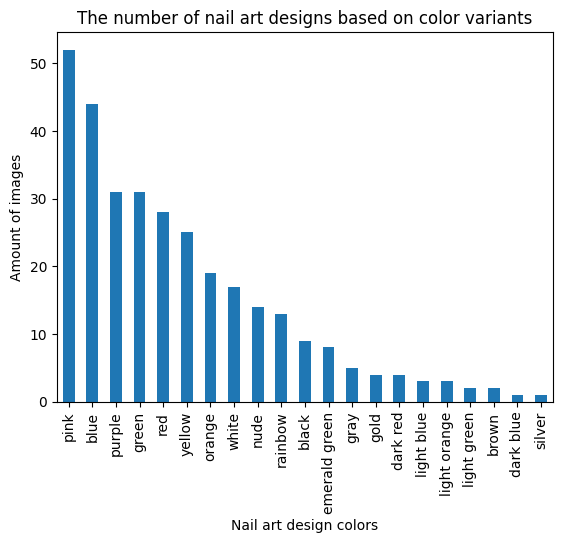

In [82]:
# Analyzing the amount of color images in the dataset
nail_df['color'] = nail_df['color'].str.split(',').str[0]   
color_values = nail_df["color"].value_counts()

color_values.plot(kind='bar')
plt.xlabel('Nail art design colors')
plt.ylabel('Amount of images')
plt.title('The number of nail art designs based on color variants')
plt.show()


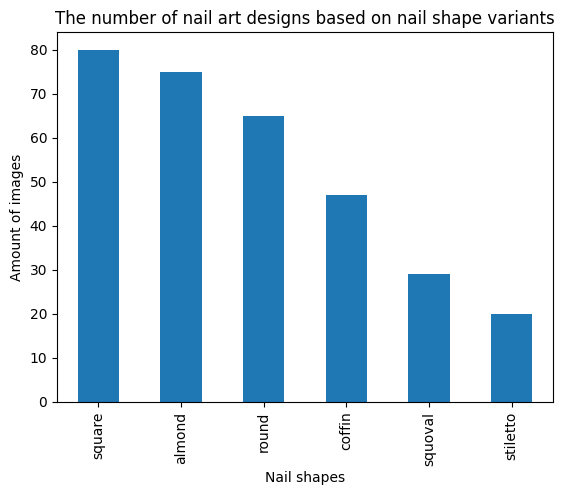

In [83]:
# Analyzing the amount of images based on the nail shape.
shape_values = nail_df["shape"].value_counts()
shape_values

shape_values.plot(kind='bar')
plt.xlabel('Nail shapes')
plt.ylabel('Amount of images')
plt.title('The number of nail art designs based on nail shape variants')
plt.show()

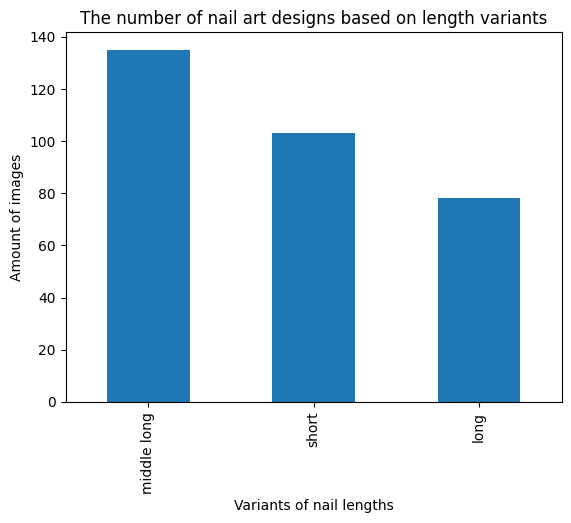

In [84]:
# Analyzing the amount of images based on the length of the nail.
length_values = nail_df["length"].value_counts()

length_values.plot(kind='bar')
plt.xlabel('Variants of nail lengths')
plt.ylabel('Amount of images')
plt.title('The number of nail art designs based on length variants')
plt.show()

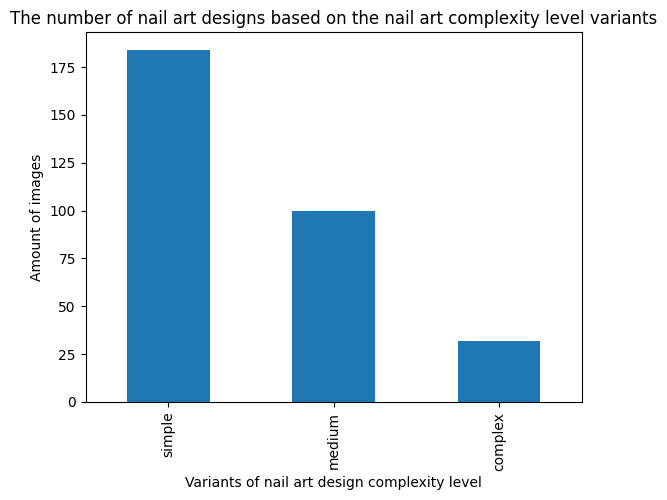

In [85]:
# Analyzing the amount of images based on the nail art complexity level.

nailartlevel_values = nail_df["nail art level"].value_counts()

nailartlevel_values.plot(kind='bar')
plt.xlabel('Variants of nail art design complexity level')
plt.ylabel('Amount of images')
plt.title('The number of nail art designs based on the nail art complexity level variants')
plt.show()

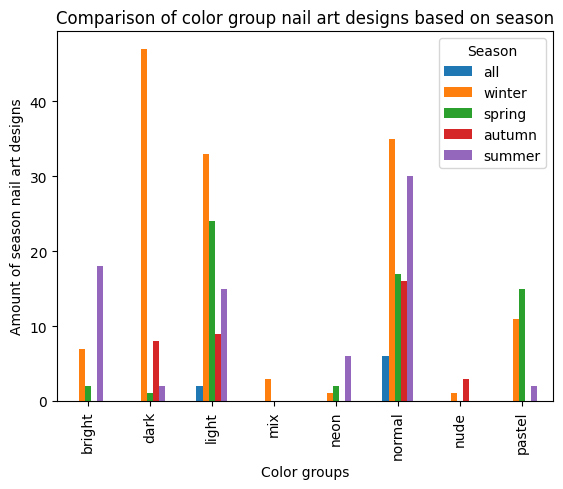

In [86]:
# Analyzing which color groups are most likly to be associated with a specific season.

# Getting the specific seasons from all rows and getting the specific color groups form all rows
nail_df['season'] = nail_df['season'].str.split(',').str[0]
nail_df['color group'] = nail_df['color group'].str.split(',').str[0]
nail_df['color group'] 
# Grouping the variables based on color group and season and then count it
waarde_counts = nail_df.groupby(['color group', 'season']).size().unstack()

# Renaming the columns because the columns autumn, spring and summer have two columns with the same name.
waarde_counts.columns = ['all', 'autumn1', 'autumn2', 'spring1', 'spring2', 'summer1', 'summer2', 'winter']
waarde_counts.fillna(0, inplace=True)

# Combining the two columns together so there is one variable for all seasons.
waarde_counts['spring'] = waarde_counts['spring1'].add(waarde_counts['spring2'])
waarde_counts['autumn'] = waarde_counts['autumn1'].add(waarde_counts['autumn2'])
waarde_counts['summer'] = waarde_counts['summer1'].add(waarde_counts['summer2'])


# Removing the old unnecessary columns
remove_columns = ['autumn1', 'autumn2', 'spring1', 'spring2', 'summer1', 'summer2']
waarde_counts.drop(remove_columns, axis=1, inplace=True)

#Visualizing the data
waarde_counts.plot(kind='bar')
plt.xlabel('Color groups')
plt.ylabel('Amount of season nail art designs')
plt.title('Comparison of color group nail art designs based on season')
plt.legend(title='Season')
plt.show()

## Machine learning model: Recommendation system

In this section the recommender system model is build

In [87]:
# creating 1 string of all important data points
nail_df['sum data'] = nail_df['color'] + ", " + nail_df['color group'] + ", " + nail_df['shape'] + ", " + nail_df['length'] + ", " + nail_df['nail art'] + ", " + nail_df['nail art level'] + ", " + nail_df['nail art style'] + ", " + nail_df['topic effect'] + ", " + nail_df['season'] + ", " + nail_df['mood'] + ", " + nail_df['occasion']

#check = nail_df.loc[1, 'total string']

nail_df

,Image ID,Image url,color,color group,shape,length,nail art,nail art level,nail art style,topic effect,season,mood,occasion,sum data
0,1,https://i.pinimg.com/564x/aa/f6/30/aaf630447ee...,emerald green,dark,square,short,yes,simple,"stripes, full covered, chrome",shine,winter,"calm, comfortable, grateful, hopeful, kind, me...","outdoors, holiday","emerald green, dark, square, short, yes, simpl..."
1,2,https://i.pinimg.com/564x/e8/16/be/e816be0a903...,emerald green,dark,square,short,yes,simple,"small art, hearts, full covered",shine,winter,"calm, comfortable, grateful, hopeful, kind, me...","outdoors, holiday","emerald green, dark, square, short, yes, simpl..."
2,3,https://i.pinimg.com/564x/ff/b1/97/ffb19745ff6...,emerald green,dark,square,short,yes,simple,"stripes, full covered","shine, glitters",winter,"calm, comfortable, grateful, hopeful, kind, me...","outdoors, holiday, engaged, wedding","emerald green, dark, square, short, yes, simpl..."
3,4,https://i.pinimg.com/564x/06/17/ca/0617caf5762...,emerald green,dark,square,short,yes,simple,"stripes, full covered",shine,winter,"calm, comfortable, grateful, hopeful, kind, me...","outdoors, holiday","emerald green, dark, square, short, yes, simpl..."
4,5,https://i.pinimg.com/564x/89/43/42/8943426ccf5...,green,normal,square,short,yes,simple,french tips,glitters,summer,"calm, comfortable, grateful, hopeful, kind, me...","outdoors, holiday","green, normal, square, short, yes, simple, fre..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,316,https://i.pinimg.com/474x/21/1f/f6/211ff6bc4f8...,purple,dark,squoval,short,yes,simple,"multicolor, marble, glitters, full covered","shine, glitters",winter,"calm, comfortable, creative, excited, mysterio...","outdoors, engaged, holiday, wedding","purple, dark, squoval, short, yes, simple, mul..."
316,317,https://i.pinimg.com/474x/d1/52/5e/d1525ef801f...,nude,light,almond,middle long,yes,medium,"french tips, flowers, detailled",shine,autumn,"adventurous, ambitious, confident, creative, e...",vacation,"nude, light, almond, middle long, yes, medium,..."
317,318,https://i.pinimg.com/474x/32/21/38/32213873d98...,white,light,square,middle long,yes,simple,"french tips, smileys",shine,spring,"calm, comfortable, grateful, hopeful, kind, me...","outdoors, holiday, engaged, wedding","white, light, square, middle long, yes, simple..."
318,319,https://i.pinimg.com/474x/92/f7/cd/92f7cd31da7...,pink,light,round,short,yes,simple,"full covered, swirl, dots",shine,spring,"admired, affectionate, beautiful, calm, comfo...","engaged, birthday","pink, light, round, short, yes, simple, full c..."


In [88]:
# Importing TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Cosine similarity

from sklearn.metrics.pairwise import cosine_similarity

# Importing image display 
from IPython.display import Image


In [89]:
# Setting the vectorizer and transform the sum data column to vectors.
vectorizer = TfidfVectorizer()

vectorized_data = vectorizer.fit_transform(nail_df['sum data'])

print(vectorizer.get_feature_names())


['3d', 'abstract', 'admired', 'adventurous', 'affectionate', 'all', 'almond', 'ambitious', 'animal', 'animals', 'art', 'astonished', 'autumn', 'ballons', 'beach', 'beautiful', 'big', 'birthday', 'black', 'blue', 'brave', 'bright', 'brown', 'brush', 'bunny', 'butterfly', 'calm', 'cartoon', 'cat', 'checkerboard', 'cheer', 'cherries', 'chevron', 'chicken', 'chilli', 'chrome', 'clean', 'clouds', 'coffin', 'comfortable', 'complex', 'confident', 'covered', 'creative', 'dark', 'detailled', 'dots', 'drinks', 'ears', 'earthy', 'easter', 'eggs', 'elated', 'elegant', 'emerald', 'energetic', 'engaged', 'excited', 'eyes', 'fantasy', 'feminine', 'figures', 'flakes', 'flames', 'flowers', 'french', 'friendly', 'frog', 'fruit', 'full', 'geometric', 'ghost', 'girly', 'glitters', 'gogh', 'gold', 'golden', 'grateful', 'gray', 'green', 'half', 'halloween', 'happy', 'hearts', 'holiday', 'hopeful', 'inspired', 'joy', 'joyful', 'kind', 'ladybird', 'lemon', 'leopard', 'light', 'long', 'love', 'lust', 'mandela'

C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [90]:
# Creating a function that transforms the input data to vectors and calculates the cosine simalarity
def find_similar_images(user_input):
    vectorizer = TfidfVectorizer()

    vectorized_data = vectorizer.fit_transform(nail_df['sum data'])

    shape_features = ['square', 'round', 'squoval', 'almond', 'coffin', 'stiletto']
    color_features = ['red', 'yellow', 'orange', 'blue', 'purple', 'pink', 'green', 'white', 'gray', 'gold', 'silver', 'brown', 'nude', 'black']
    length_features = ['short', 'middle', 'long']
    nailartstyle_features = ['3d', 'abstract', 'animal', 'print', 'animals', 'art', 'ballons', 'beach', 'brush', 'strokes', 'bunny', 'butterfly', 'cartoon', 'cat', 'checkerboard', 'cherries', 'chevron', 'chicken', 'chilli', 'chrome', 'clouds', 'dots', 'drinks', 'easter', 'eggs', 'eyes', 'fantasy', 'figures', 'gold', 'flakes', 'flames', 'flowers', 'french', 'tips', 'frog', 'fruit', 'geometric', 'ghost', 'glitters', 'halloween', 'hearts', 'ladybird', 'lemon', 'leopard', 'mandela', 'marble', 'metallic', 'micky', 'mouse', 'moon', 'mushroom', 'mystery', 'ombre', 'orange', 'painting', 'paisley', 'palm', 'tree', 'patterns', 'reindeer', 'retro', 'reversed', 'tip', 'smileys', 'spiritual', 'splatter', 'stars', 'stickers', 'stones', 'strawberry', 'stripes', 'sun', 'sunflower', 'swirl', 'text', 'vacation', 'vegetable', 'watermelon', 'ying', 'yang', 'zebra']
    nailartlevel_features = ['simple', 'medium', 'complex']
    topcoat_features = ['shine', 'shimmer', 'glitters', 'matte']
    colorgroup_features = ['light', 'dark', 'pastel', 'neon', 'normal']
    mood_features = ['admired', 'adventurous', 'affectionate', 'ambitious', 'astonished', 'beautiful', 'brave', 'calm', 'cheer', 'clean', 'comfortable', 'confident', 'creative', 'earthy', 'elated', 'elegant', 'energetic','excited','feminine', 'friendly', 'girly', 'grateful', 'happy','hopeful','inspired', 'joy', 'joyful','kind', 'love', 'lust', 'merry', 'mysterious', 'neutral', 'nice', 'passion', 'peaceful', 'powerful', 'proud', 'relaxed','safe', 'satisfied', 'secure', 'sensual', 'strong', 'surprised', 'triumphant', 'wise', 'youthful']
    season_features = ['summer', 'spring', 'winter', 'autumn']
    occasion_features = ['outdoors', 'holiday', 'engaged', 'birthday', 'vacation', 'wedding']

    
    shape_color_indexes = [vectorizer.vocabulary_[f] for f in shape_features]
    color_indexes = [vectorizer.vocabulary_[f] for f in color_features]
    colorgroup_indexes = [vectorizer.vocabulary_[f] for f in colorgroup_features]
    length_indexes = [vectorizer.vocabulary_[f] for f in length_features]
    nailartstyle_indexes = [vectorizer.vocabulary_[f] for f in nailartstyle_features]
    nailartlevel_indexes = [vectorizer.vocabulary_[f] for f in nailartlevel_features]
    topcoat_indexes = [vectorizer.vocabulary_[f] for f in topcoat_features]
    mood_indexes = [vectorizer.vocabulary_[f] for f in mood_features]
    season_indexes = [vectorizer.vocabulary_[f] for f in season_features]
    occasion_indexes = [vectorizer.vocabulary_[f] for f in occasion_features]


    idf_1 = vectorizer.idf_[shape_color_indexes]
    idf_2 = vectorizer.idf_[color_indexes]
    idf_3 = vectorizer.idf_[length_indexes]
    idf_4 = vectorizer.idf_[nailartstyle_indexes]
    idf_5 = vectorizer.idf_[nailartlevel_indexes]
    idf_6 = vectorizer.idf_[topcoat_indexes]
    idf_7 = vectorizer.idf_[colorgroup_indexes]
    idf_8 = vectorizer.idf_[mood_indexes]
    idf_9 = vectorizer.idf_[season_indexes]
    idf_10 = vectorizer.idf_[occasion_indexes]


    # Adding weights to the variables
    tfidf_weights = vectorized_data.toarray()[0]

    tfidf_weights[shape_color_indexes] = idf_1 * 8
    tfidf_weights[color_indexes] = idf_2 * 10
    tfidf_weights[length_indexes] = idf_3 * 6
    tfidf_weights[nailartstyle_indexes] = idf_4 * 5
    tfidf_weights[nailartlevel_indexes] = idf_5 * 4
    tfidf_weights[topcoat_indexes] = idf_6 * 10
    tfidf_weights[colorgroup_indexes] = idf_7 * 10
    tfidf_weights[mood_indexes] = idf_8 * 4
    tfidf_weights[season_indexes] = idf_9 * 4
    tfidf_weights[occasion_indexes] = idf_10 * 4

    vectorized_data = np.multiply(vectorized_data.toarray(), tfidf_weights)

    # Converts the user input into a vector text
    user_input_vector = vectorizer.transform([user_input])

    # Calculate the cosine similarity between the user input and the nail designs
    similarity_scores = cosine_similarity(user_input_vector, vectorized_data)

    # Sort the nail designs by their cosine similarity score
    sorted_indexes = np.argsort(similarity_scores)[0][::-1]
    #print(sorted_indexes)
    # Select the top 5 nail designs
    top_nail_designs = nail_df.iloc[sorted_indexes[:5]]
    print(top_nail_designs)

    for i, index in enumerate(sorted_indexes[:5]):
        similarity_score = similarity_scores[0][index]
        print(f"Similarity score for image {i+1}: {similarity_score}")
    #print(tfidf_weights_colors[nail_color_indexes])


    # Return the top 5 nail designs
    return top_nail_designs

# Collecting input data from user
mood = input("What feelings would you like your nails to evoke? ('no preferences','admired', 'adventurous', 'affectionate', 'ambitious', 'astonished', 'beautiful', 'brave', 'calm', 'cheer', 'clean', 'comfortable', 'confident', 'creative', 'earthy', 'elated', 'elegant', 'energetic','excited','feminine', 'friendly', 'girly', 'grateful', 'happy','hopeful','inspired', 'joy', 'joyful','kind', 'love', 'lust', 'merry', 'mysterious', 'neutral', 'nice', 'passion', 'peaceful', 'powerful', 'proud', 'relaxed','safe', 'satisfied', 'secure', 'sensual', 'strong', 'surprised', 'triumphant', 'wise', 'youthful')")

occasion = input("For what occasion are you planning to do your nails for? ('no preferences', 'summer', 'spring', 'winter', 'autumn', 'outdoors', 'holiday', 'engaged', 'birthday', 'vacation', 'wedding')")

color = input("What color do you like to wear? ('no preferences', 'red', 'yellow', 'orange', 'blue', 'purple', 'pink', 'green', 'white', 'gray', 'gold', 'silver', 'brown', 'nude', 'black')")

color_group = input("What type of color are you looking for? ('no preferences','light', 'dark', 'pastel', 'neon', 'normal')")

shape = input("What shape do you like for your nails? ('no preferences','square', 'round', 'squoval', 'almond', 'coffin', 'stiletto')")

length = input("What nail length do you prefer? ('no preferences','short', 'middle', 'long')")

nail_art_level = input("What type of nail art would you like? ('no preferences', 'simple', 'medium', 'complex')")

nail_art_style = input("What nail art style do you like? ('no preferences', 'abstract', 'animal print', 'animals', 'art', 'brush strokes', 'cartoon', 'checkerboard', 'chevron', 'chrome', 'dots', 'fantasy', 'gold flakes', 'flames', 'flowers', 'french tips', 'fruit', 'geometric', 'glitters', 'hearts', 'mandela', 'marble', 'metallic', 'mystery', 'ombre','paisley', 'patterns', 'retro', 'reversed tip', 'smileys', 'spiritual', 'splatter', 'stars', 'stickers', 'stones', 'stripes', 'swirl', 'text', 'vegetable')")

top_layer = input("What would your top layer be? ('no preferences', 'shine', 'shimmer', 'glitters', 'matte')")
    
user_input = " ".join([str(color)] + [str(color_group)] + [str(shape)] + [str(length)] + [str(nail_art_style)] + [str(nail_art_level)] + [str(top_layer)] + [str(occasion)] + [str(mood)])

top_images = find_similar_images(user_input)

for i, row in top_images.iterrows():
    image_url = row['Image url']
    display(Image(url=image_url))
top_images

     Image ID                                          Image url        color  \
7           8  https://i.pinimg.com/564x/5b/78/14/5b781463f49...  light green   
164       165  https://i.pinimg.com/474x/60/f7/07/60f707e8bd4...         pink   
194       195  https://i.pinimg.com/474x/4c/b7/36/4cb73617b5e...         pink   
77         78  https://i.pinimg.com/236x/7b/ff/de/7bffde2b6ba...   light blue   
145       146  https://i.pinimg.com/474x/7b/f9/49/7bf949ed043...        green   

    color group   shape       length nail art nail art level  \
7         light  square        short      yes         simple   
164       light  square        short      yes         simple   
194       light  square        short      yes         medium   
77        light  square  middle long      yes         medium   
145       light  square  middle long      yes         simple   

                        nail art style topic effect  season  \
7            french tips, full covered        shine  winter   
16

,Image ID,Image url,color,color group,shape,length,nail art,nail art level,nail art style,topic effect,season,mood,occasion,sum data
7,8,https://i.pinimg.com/564x/5b/78/14/5b781463f49...,light green,light,square,short,yes,simple,"french tips, full covered",shine,winter,"calm, comfortable, grateful, hopeful, kind, me...","outdoors, holiday","light green, light, square, short, yes, simple..."
164,165,https://i.pinimg.com/474x/60/f7/07/60f707e8bd4...,pink,light,square,short,yes,simple,"french tips, flowers",shine,winter,"admired, affectionate, beautiful, calm, comfo...","engaged, birthday","pink, light, square, short, yes, simple, frenc..."
194,195,https://i.pinimg.com/474x/4c/b7/36/4cb73617b5e...,pink,light,square,short,yes,medium,"full covered, flowers, detailled",shine,winter,"admired, affectionate, beautiful, calm, comfo...","outdoors, engaged, holiday, wedding, birthday","pink, light, square, short, yes, medium, full ..."
77,78,https://i.pinimg.com/236x/7b/ff/de/7bffde2b6ba...,light blue,light,square,middle long,yes,medium,"full covered, medium art, flowers",shine,winter,"admired, beautiful, brave, calm, cheer, comfor...","outdoors, engaged, birthday, vacation","light blue, light, square, middle long, yes, m..."
145,146,https://i.pinimg.com/474x/7b/f9/49/7bf949ed043...,green,light,square,middle long,yes,simple,"french tips, flowers",shine,spring,"calm, comfortable, grateful, hopeful, kind, me...","outdoors, holiday","green, light, square, middle long, yes, simple..."


## Evaluation

The results are accurate when the weights was added. The data set should be larger to make better recommendations.